<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Метод-балансировки" data-toc-modified-id="Метод-балансировки-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Метод балансировки</a></span><ul class="toc-item"><li><span><a href="#Балансировка-downsampling-ом" data-toc-modified-id="Балансировка-downsampling-ом-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Балансировка downsampling-ом</a></span></li><li><span><a href="#Балансировка-upsampling-ом" data-toc-modified-id="Балансировка-upsampling-ом-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Балансировка upsampling-ом</a></span></li><li><span><a href="#Балансировка-весом-классов" data-toc-modified-id="Балансировка-весом-классов-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Балансировка весом классов</a></span></li><li><span><a href="#Промежуточный-вывод" data-toc-modified-id="Промежуточный-вывод-2.1.4"><span class="toc-item-num">2.1.4&nbsp;&nbsp;</span>Промежуточный вывод</a></span></li></ul></li><li><span><a href="#LogisticRegression" data-toc-modified-id="LogisticRegression-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>LogisticRegression</a></span></li><li><span><a href="#DecisionTreeClassifier" data-toc-modified-id="DecisionTreeClassifier-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>DecisionTreeClassifier</a></span></li><li><span><a href="#CatBoostClassifier" data-toc-modified-id="CatBoostClassifier-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>CatBoostClassifier</a></span></li><li><span><a href="#LGBMClassifier" data-toc-modified-id="LGBMClassifier-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>LGBMClassifier</a></span><ul class="toc-item"><li><span><a href="#Промежуточный-вывод" data-toc-modified-id="Промежуточный-вывод-2.5.1"><span class="toc-item-num">2.5.1&nbsp;&nbsp;</span>Промежуточный вывод</a></span></li></ul></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Выводы</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Проект для «Викишоп»

Интернет-магазин «Викишоп» запускает новый сервис. Теперь пользователи могут редактировать и дополнять описания товаров, как в вики-сообществах. То есть клиенты предлагают свои правки и комментируют изменения других. Магазину нужен инструмент, который будет искать токсичные комментарии и отправлять их на модерацию. 

Обучите модель классифицировать комментарии на позитивные и негативные. В вашем распоряжении набор данных с разметкой о токсичности правок.

Постройте модель со значением метрики качества *F1* не меньше 0.75. 

**Инструкция по выполнению проекта**

1. Загрузите и подготовьте данные.
2. Обучите разные модели. 
3. Сделайте выводы.

Для выполнения проекта применять *BERT* необязательно, но вы можете попробовать.

**Описание данных**

Данные находятся в файле `toxic_comments.csv`. Столбец *text* в нём содержит текст комментария, а *toxic* — целевой признак.

## Подготовка

In [1]:
import numpy as np
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords as nltk_stopwords
from nltk.corpus import wordnet
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
stopwords = set(nltk_stopwords.words('russian'))
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords as nltk_stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, roc_auc_score, roc_curve
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import warnings
import time
import lightgbm as lgbm
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mseme\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mseme\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\mseme\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mseme\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\mseme\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:
try:
    data =  pd.read_csv('/datasets/toxic_comments.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/toxic_comments.csv')
data.head()

,Unnamed: 0,text,toxic
0,0,Explanation\nWhy the edits made under my usern...,0
1,1,D'aww! He matches this background colour I'm s...,0
2,2,"Hey man, I'm really not trying to edit war. It...",0
3,3,"""\nMore\nI can't make any real suggestions on ...",0
4,4,"You, sir, are my hero. Any chance you remember...",0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159292 entries, 0 to 159291
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  159292 non-null  int64 
 1   text        159292 non-null  object
 2   toxic       159292 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.6+ MB


Столбец unnnamed выглядит так, как будто он повторяет индекс. Проверим это.

In [4]:
len(data['Unnamed: 0'].unique())

159292

In [5]:
data['Unnamed: 0'].max()

159450

In [6]:
data['Unnamed: 0'].min()

0

Хотя максимальное значение и не совпадает с максимальным значением индекса, так как в этом столбце такое же количество уникальных значений, сколько значений индекса, можем предположить что это прошлый индекс, который впоследсвии был сброшен.
Отбросим этот столбец за ненадобностью.

In [7]:
data_fin = data.drop(columns=['Unnamed: 0'])

In [8]:
data_fin.head()

,text,toxic
0,Explanation\nWhy the edits made under my usern...,0
1,D'aww! He matches this background colour I'm s...,0
2,"Hey man, I'm really not trying to edit war. It...",0
3,"""\nMore\nI can't make any real suggestions on ...",0
4,"You, sir, are my hero. Any chance you remember...",0


In [9]:
data_fin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159292 entries, 0 to 159291
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    159292 non-null  object
 1   toxic   159292 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ MB


Рассмотрим столбец `toxic`.

In [10]:
data_fin.toxic.value_counts()

0    143106
1     16186
Name: toxic, dtype: int64

Классы несбалансированы

In [11]:
data_fin.toxic.value_counts().min() / data.toxic.count()

0.10161213369158527

Как можем заметить классы крайне несбалансированы, придётся провести их балансировку. Сделаем это енсколькими разными сппособами и сравним их эффективность на классификаторе логистической регрессии.

Подготовим перед этим текст к обработке. Лемматизируем его.

In [12]:
def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV
               }  
    return tag_dict.get(tag, wordnet.NOUN)

In [13]:
lemmatizer = WordNetLemmatizer()
def lemmatize_text(text):
    lower_text = text.lower()
    sub_text = re.sub(r'[^a-zA-Z]', ' ', lower_text)
    rec_text = " ".join(sub_text.split())
    lemm_text = [lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in nltk.word_tokenize(rec_text)]
    return " ".join(lemm_text)

In [14]:
%%time
data_fin['lemm_text'] = None
data_fin['lemm_text'] = data_fin['text'].apply(lemmatize_text)

data_fin = data_fin.drop(['text'], axis=1)

Wall time: 58min 17s


In [15]:
data_fin.head()

,toxic,lemm_text
0,0,explanation why the edits make under my userna...
1,0,d aww he match this background colour i m seem...
2,0,hey man i m really not try to edit war it s ju...
3,0,more i can t make any real suggestion on impro...
4,0,you sir be my hero any chance you remember wha...


Выделим целевой признак.

In [16]:
features = data_fin.lemm_text
target = data_fin.toxic

Разделим выборки на тренировочную, валидационную и тестовую в соотношении 80/10/10.

In [17]:
features_train, features_valid, target_train, target_valid = train_test_split(features, target, shuffle=False, random_state=12345, test_size=0.2)
features_valid, features_test, target_valid, target_test = train_test_split(features_valid, target_valid, shuffle=False, random_state=12345, test_size=0.5)

Произведём TF-IDF векторизацию текста.

In [18]:
count_tf_idf = TfidfVectorizer(stop_words=stopwords)
count_tf_idf.fit(features_train)
features_valid = count_tf_idf.transform(features_valid)
features_test = count_tf_idf.transform(features_test)

## Обучение

### Метод балансировки

Применим различные способы балансировки классов, проверим их на логистической регрессии.

#### Балансировка downsampling-ом

In [19]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, target_train.value_counts()[1] / target_train.value_counts()[0])
features_downsampled = count_tf_idf.transform(features_downsampled)
model = LogisticRegression(solver='liblinear', random_state=12345)
model.fit(features_downsampled, target_downsampled)
predictions_down = model.predict(features_valid)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr_d, tpr_d, thresholds_d = roc_curve(target_valid, probabilities_one_valid)
auc_roc_d = roc_auc_score(target_valid, probabilities_one_valid)
f1_score_down = f1_score(target_valid, predictions_down)

#### Балансировка upsampling-ом

In [20]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    features_upsampled = shuffle(features_upsampled, random_state=12345)
    target_upsampled = shuffle(target_upsampled, random_state=12345)
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, int(target_train.value_counts()[0] / target_train.value_counts()[1]))
features_upsampled = count_tf_idf.transform(features_upsampled)
model = LogisticRegression(solver='liblinear', random_state=12345)
model.fit(features_upsampled, target_upsampled)
predictions_up = model.predict(features_valid)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr_u, tpr_u, thresholds_u = roc_curve(target_valid, probabilities_one_valid)
auc_roc_u = roc_auc_score(target_valid, probabilities_one_valid)
f1_score_up = f1_score(target_valid, predictions_up)

#### Балансировка весом классов

In [21]:
model = LogisticRegression(class_weight='balanced', solver='liblinear', random_state=12345)
features_train_tf = count_tf_idf.transform(features_train)
model.fit(features_train_tf, target_train)
predictions_weight = model.predict(features_valid)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr_w, tpr_w, thresholds_w = roc_curve(target_valid, probabilities_one_valid)
auc_roc_w = roc_auc_score(target_valid, probabilities_one_valid)
f1_score_weight = f1_score(target_valid, predictions_weight)

Представим полученные результаты графически и соберём полученные данные в сводную таблицу.

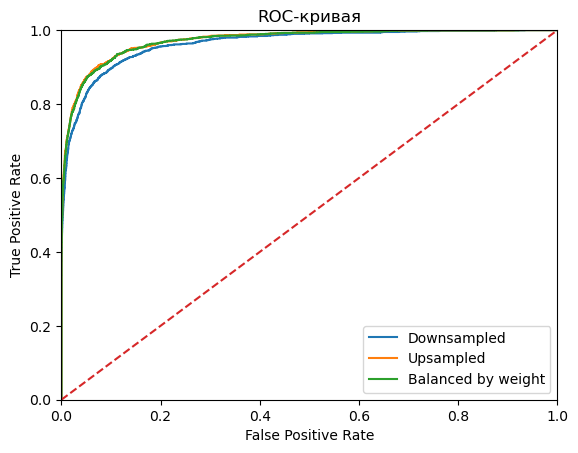

In [22]:
plt.figure()

plt.plot(fpr_d, tpr_d, label='Downsampled')
plt.plot(fpr_u, tpr_u, label='Upsampled')
plt.plot(fpr_w, tpr_w, label='Balanced by weight')

# ROC-кривая случайной модели (выглядит как прямая)
plt.plot([0, 1], [0, 1], linestyle='--')

# < примените функции plt.xlim() и plt.ylim(), чтобы
#   установить границы осей от 0 до 1 >
plt.xlim(0, 1)
plt.ylim(0, 1)

# < примените функции plt.xlabel() и plt.ylabel(), чтобы
#   подписать оси "False Positive Rate" и "True Positive Rate" >
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# < добавьте к графику заголовок "ROC-кривая" функцией plt.title() >
plt.title('ROC-кривая')
plt.legend()

plt.show()

In [23]:
comp_table = pd.DataFrame(index=['Downsampled', 'Upsampled', 'Balanced by weight'], columns=['F1-score', 'AUC-ROC'])
comp_table['F1-score'] = f1_score_down, f1_score_up, f1_score_weight
comp_table['AUC-ROC'] = auc_roc_d, auc_roc_u, auc_roc_w
comp_table
comp_table.style.highlight_max(color='yellowgreen',subset=['F1-score', 'AUC-ROC']).highlight_null(null_color='lightgrey').highlight_min(color='coral',subset=['F1-score', 'AUC-ROC'])

,F1-score,AUC-ROC
Downsampled,0.685729,0.963260
Upsampled,0.767209,0.972612
Balanced by weight,0.750413,0.971808


#### Промежуточный вывод
Наилучшую F1-меру (и AUC-ROC-меру) показывает набор данных, на котором был применён upsampling, в дальнейшем будем использовать именно его.

Перейдём к обучению различных моделей.
Будем обучать модели `LogisticRegression`, `DecisionTreeClassifier`, `CatBoostClassifier`, `LGBMClassifier`. Применим при этом `GridSearchCV`.

In [24]:
features_train = features_upsampled
target_train = target_upsampled

### LogisticRegression

In [25]:
%%time
params = [{'penalty':['l1', 'l2', 'elasticnet'], 'solver':['lbfgs', 'liblinear', 'newton-cholesky', 'sag'], 'random_state':[12345], 'max_iter':[100, 200, 500]}]
best_lr = GridSearchCV(LogisticRegression(), params, scoring='f1', verbose=10, cv=3, return_train_score=True)
best_lr.fit(features_train, target_train)
print(best_lr.best_params_)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV 1/3; 1/36] START max_iter=100, penalty=l1, random_state=12345, solver=lbfgs.
[CV 1/3; 1/36] END max_iter=100, penalty=l1, random_state=12345, solver=lbfgs;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3; 1/36] START max_iter=100, penalty=l1, random_state=12345, solver=lbfgs.
[CV 2/3; 1/36] END max_iter=100, penalty=l1, random_state=12345, solver=lbfgs;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3; 1/36] START max_iter=100, penalty=l1, random_state=12345, solver=lbfgs.
[CV 3/3; 1/36] END max_iter=100, penalty=l1, random_state=12345, solver=lbfgs;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3; 2/36] START max_iter=100, penalty=l1, random_state=12345, solver=liblinear
[CV 1/3; 2/36] END max_iter=100, penalty=l1, random_state=12345, solver=liblinear;, score=(train=0.963, test=0.953) total time=   1.0s
[CV 2/3; 2/36] START max_iter=100, penalty=l1, random_state=12345, solver=liblinear
[CV 2/3; 2/

Обучим модель с лучшими параметрами, проверим её на валидационной выборке и сохраним результаты.

In [26]:
params_lr = best_lr.best_params_
params_lr

{'max_iter': 100,
 'penalty': 'l1',
 'random_state': 12345,
 'solver': 'liblinear'}

In [27]:
%%time
start = time.time()
model_lr = LogisticRegression(penalty=params_lr['penalty'], solver=params_lr['solver'], random_state=params_lr['random_state'], max_iter=params_lr['max_iter'])
model_lr.fit(features_train, target_train)
end = time.time()
t_lr_t = end - start

Wall time: 1.64 s


In [28]:
print(' Гиперпараметры модели:\n', model_lr, model_lr.get_params())

 Гиперпараметры модели:
 LogisticRegression(penalty='l1', random_state=12345, solver='liblinear') {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l1', 'random_state': 12345, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [29]:
%%time
start = time.time()
predict_lr = model_lr.predict(features_valid)
end = time.time()
t_lr_p = end - start
f1_lr = f1_score(target_valid, predict_lr)

Wall time: 4 ms


### DecisionTreeClassifier

In [30]:
%%time
params = [{'criterion':['gini', 'entropy', 'logloss'], 'min_samples_split':[2, 5, 10], 'max_features':[None, 'auto', 'sqrt', 'log2'], 'random_state':[12345]}]
best_dt = GridSearchCV(DecisionTreeClassifier(), params, scoring='f1', verbose=10, cv=3, return_train_score=True)
best_dt.fit(features_train, target_train)
print(best_dt.best_params_)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV 1/3; 1/36] START criterion=gini, max_features=None, min_samples_split=2, random_state=12345
[CV 1/3; 1/36] END criterion=gini, max_features=None, min_samples_split=2, random_state=12345;, score=(train=1.000, test=0.960) total time= 1.3min
[CV 2/3; 1/36] START criterion=gini, max_features=None, min_samples_split=2, random_state=12345
[CV 2/3; 1/36] END criterion=gini, max_features=None, min_samples_split=2, random_state=12345;, score=(train=1.000, test=0.959) total time= 1.4min
[CV 3/3; 1/36] START criterion=gini, max_features=None, min_samples_split=2, random_state=12345
[CV 3/3; 1/36] END criterion=gini, max_features=None, min_samples_split=2, random_state=12345;, score=(train=1.000, test=0.961) total time= 1.4min
[CV 1/3; 2/36] START criterion=gini, max_features=None, min_samples_split=5, random_state=12345
[CV 1/3; 2/36] END criterion=gini, max_features=None, min_samples_split=5, random_state=12345;, score=(train=1.00

Обучим модель с лучшими параметрами, проверим её на валидационной выборке и сохраним результаты.

In [31]:
params_dt = best_dt.best_params_
params_dt

{'criterion': 'entropy',
 'max_features': None,
 'min_samples_split': 2,
 'random_state': 12345}

In [32]:
%%time
start = time.time()
model_dt = DecisionTreeClassifier(criterion=params_dt['criterion'], min_samples_split=params_dt['min_samples_split'], max_features=params_dt['max_features'], random_state=params_dt['random_state'])
model_dt.fit(features_train, target_train)
end = time.time()
t_dt_t = end - start

Wall time: 1min 22s


In [33]:
print(' Гиперпараметры модели:\n', model_dt, model_dt.get_params())

 Гиперпараметры модели:
 DecisionTreeClassifier(criterion='entropy', random_state=12345) {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 12345, 'splitter': 'best'}


In [34]:
%%time
start = time.time()
predict_dt = model_dt.predict(features_valid)
end = time.time()
t_dt_p = end - start
f1_dt = f1_score(target_valid, predict_dt)

Wall time: 16 ms


### CatBoostClassifier

In [35]:
%%time
params = [{'iterations':[100, 200, 500], 'learning_rate':[.03, .1, .4], 'eval_metric':['F1'], 'logging_level':['Silent'],  'random_state':[12345]}]
best_cbc = GridSearchCV(CatBoostClassifier(), params, scoring='f1', verbose=10, cv=3, return_train_score=True)
best_cbc.fit(features_train, target_train)
print(best_cbc.best_params_)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3; 1/9] START eval_metric=F1, iterations=100, learning_rate=0.03, logging_level=Silent, random_state=12345
[CV 1/3; 1/9] END eval_metric=F1, iterations=100, learning_rate=0.03, logging_level=Silent, random_state=12345;, score=(train=0.810, test=0.812) total time=  41.8s
[CV 2/3; 1/9] START eval_metric=F1, iterations=100, learning_rate=0.03, logging_level=Silent, random_state=12345
[CV 2/3; 1/9] END eval_metric=F1, iterations=100, learning_rate=0.03, logging_level=Silent, random_state=12345;, score=(train=0.813, test=0.812) total time=  41.4s
[CV 3/3; 1/9] START eval_metric=F1, iterations=100, learning_rate=0.03, logging_level=Silent, random_state=12345
[CV 3/3; 1/9] END eval_metric=F1, iterations=100, learning_rate=0.03, logging_level=Silent, random_state=12345;, score=(train=0.814, test=0.809) total time=  41.7s
[CV 1/3; 2/9] START eval_metric=F1, iterations=100, learning_rate=0.1, logging_level=Silent, random_state=123

Обучим модель с лучшими параметрами, проверим её на валидационной выборке и сохраним результаты.

In [36]:
params_cbc = best_cbc.best_params_
params_cbc

{'eval_metric': 'F1',
 'iterations': 500,
 'learning_rate': 0.4,
 'logging_level': 'Silent',
 'random_state': 12345}

In [37]:
%%time
start = time.time()
model_cbc = CatBoostClassifier(iterations=params_cbc['iterations'], learning_rate=params_cbc['learning_rate'], eval_metric=params_cbc['eval_metric'], random_state=params_cbc['random_state'])
model_cbc.fit(features_train, target_train)
end = time.time()
t_cbc_t = end - start

0:	learn: 0.6520558	total: 546ms	remaining: 4m 32s
1:	learn: 0.6963407	total: 1.05s	remaining: 4m 22s
2:	learn: 0.7360086	total: 1.55s	remaining: 4m 16s
3:	learn: 0.7595107	total: 2.04s	remaining: 4m 13s
4:	learn: 0.7776878	total: 2.56s	remaining: 4m 13s
5:	learn: 0.7854848	total: 3.05s	remaining: 4m 11s
6:	learn: 0.7948777	total: 3.54s	remaining: 4m 9s
7:	learn: 0.8050005	total: 4s	remaining: 4m 5s
8:	learn: 0.8127834	total: 4.47s	remaining: 4m 3s
9:	learn: 0.8188477	total: 4.94s	remaining: 4m 2s
10:	learn: 0.8264061	total: 5.43s	remaining: 4m 1s
11:	learn: 0.8309345	total: 5.89s	remaining: 3m 59s
12:	learn: 0.8335782	total: 6.38s	remaining: 3m 59s
13:	learn: 0.8362498	total: 6.86s	remaining: 3m 58s
14:	learn: 0.8411005	total: 7.37s	remaining: 3m 58s
15:	learn: 0.8424206	total: 7.84s	remaining: 3m 57s
16:	learn: 0.8461706	total: 8.31s	remaining: 3m 56s
17:	learn: 0.8502080	total: 8.78s	remaining: 3m 55s
18:	learn: 0.8515193	total: 9.27s	remaining: 3m 54s
19:	learn: 0.8537515	total: 9.

In [38]:
print(' Гиперпараметры модели:\n', model_cbc, model_cbc.get_params())

 Гиперпараметры модели:
 <catboost.core.CatBoostClassifier object at 0x000001BB20D1DA90> {'iterations': 500, 'learning_rate': 0.4, 'eval_metric': 'F1', 'random_state': 12345}


In [39]:
%%time
start = time.time()
predict_cbc = model_cbc.predict(features_valid)
end = time.time()
t_cbc_p = end - start
f1_cbc = f1_score(target_valid, predict_cbc)

Wall time: 337 ms


### LGBMClassifier

In [40]:
%%time
params = [{'n_estimators':[100, 200, 500, 1000], 'num_leaves':[25, 50, 100, 200], 'learning_rate':[.2, .4, .6], 'random_state':[12345]}]
best_lgb = GridSearchCV(lgbm.sklearn.LGBMClassifier(), params, scoring='f1', verbose=10, cv=3, return_train_score=True)
best_lgb.fit(features_train, target_train)
print(best_lgb.best_params_)

Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV 1/3; 1/48] START learning_rate=0.2, n_estimators=100, num_leaves=25, random_state=12345
[LightGBM] [Info] Number of positive: 69184, number of negative: 76307
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.602741 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 525234
[LightGBM] [Info] Number of data points in the train set: 145491, number of used features: 10449
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.475521 -> initscore=-0.097995
[LightGBM] [Info] Start training from score -0.097995
[CV 1/3; 1/48] END learning_rate=0.2, n_estimators=100, num_leaves=25, random_state=12345;, score=(train=0.931, test=0.924) total time=   7.8s
[CV 2/3; 1/48] START learning_rate=0.2, n_estimators=100, num_leaves=25, random_state=12345
[LightGBM] [Info] Number of positive: 69184, number of negative: 76307
[LightGBM] [Info] Auto-choosing col-wise

Обучим модель с лучшими параметрами, проверим её на валидационной выборке и сохраним результаты.

In [41]:
params_lgb = best_lgb.best_params_
params_lgb

{'learning_rate': 0.2,
 'n_estimators': 1000,
 'num_leaves': 200,
 'random_state': 12345}

In [42]:
%%time
start = time.time()
model_lgb = lgbm.sklearn.LGBMClassifier(n_estimators=params_lgb['n_estimators'], num_leaves=params_lgb['num_leaves'], random_state=params_lgb['random_state'], learning_rate=params_lgb['learning_rate'], verbose=100)
model_lgb.fit(features_train, target_train)
end = time.time()
t_lgb_t = end - start

[LightGBM] [Info] Number of positive: 103776, number of negative: 114461
[LightGBM] [Debug] Dataset::GetMultiBinFromSparseFeatures: sparse rate 0.997763
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.997531
[LightGBM] [Debug] init for col-wise cost 1.178508 seconds, init for row-wise cost 1.130678 seconds
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 1.234271 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Debug] Using Sparse Multi-Val Bin
[LightGBM] [Info] Total Bins 641355
[LightGBM] [Info] Number of data points in the train set: 218237, number of used features: 13726
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.475520 -> initscore=-0.097999
[LightGBM] [Info] Start training from score -0.097999
[LightGBM] [Debug] Trained a tree with leaves = 200 and depth = 63
[LightGBM] [Debug] Trained a tree with leaves = 200 and depth = 

In [43]:
print(' Гиперпараметры модели:\n', model_lgb, model_lgb.get_params())

 Гиперпараметры модели:
 LGBMClassifier(learning_rate=0.2, n_estimators=1000, num_leaves=200,
               random_state=12345, verbose=100) {'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 1.0, 'importance_type': 'split', 'learning_rate': 0.2, 'max_depth': -1, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 1000, 'n_jobs': None, 'num_leaves': 200, 'objective': None, 'random_state': 12345, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'subsample': 1.0, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'verbose': 100}


In [44]:
%%time
start = time.time()
predict_lgb = model_cbc.predict(features_valid)
end = time.time()
t_lgb_p = end - start
f1_lgb = f1_score(target_valid, predict_lgb)

Wall time: 338 ms


Соберём полученные результаты в сводную таблицу

In [45]:
columns = ['F1-score','Скорость обучения, s','Скорость предсказания, s']

comp_tab = pd.DataFrame(columns=columns, index=['LogisticRegression','DecisionTreeClassifier','CatBoostClassifier', 'LightGBMClassifier'])
comp_tab['F1-score'] = f1_lr, f1_dt, f1_cbc, f1_lgb
comp_tab['Скорость обучения, s'] = t_lr_t, t_dt_t, t_cbc_t, t_lgb_t
comp_tab['Скорость предсказания, s'] = t_lr_p, t_dt_p, t_cbc_p, t_lgb_p

comp_tab.style.highlight_max(color='yellowgreen', subset=['F1-score']).highlight_max(color='coral', subset=['Скорость обучения, s','Скорость предсказания, s']).highlight_null(null_color='lightgrey').highlight_min(color='yellowgreen', subset=['Скорость обучения, s','Скорость предсказания, s']).highlight_min(color='coral', subset=['F1-score'])

,F1-score,"Скорость обучения, s","Скорость предсказания, s"
LogisticRegression,0.767068,1.635470,0.002003
DecisionTreeClassifier,0.591904,82.568585,0.013012
CatBoostClassifier,0.767366,222.340049,0.331814
LightGBMClassifier,0.767366,255.251979,0.333813


#### Промежуточный вывод

1. Лучший результат с точки зрения скорости обучения и предсказания показала модель `LogisticRegression`, н порядок опережая даже вторую по скорости модель `DecisionTreeClassifier`;
2. Единственная модель, которая не преодолела порог по метрике F1 - `DecisionTreeClassifier`, набрав всего 0,59, при требуемых F1 > 0,75;
3. Модели `CatBoostClassifier` и `LightGBMClassifier` показали идентичные лучшие результаты по F1 метрике, но `LightGBMClassifier` требует больше времени на обучение и немного больше на предсказание, являясь таким образом самой медленной моделью из исследованных. При этом F1-метрика данных моделей не сильно отличается от F1-метрики `LogisticRegression`.

По таблице можно заметить, что лучшие результаты показали модели `CatBoostClassifier` и `LightGBMClassifier`. Проверим модель `CatBoostClassifier` на тестовой выборке, так как её скорость обучения и предсказания несколько выше `LightGBMClassifier`.

In [48]:
predict_test = model_cbc.predict(features_test)
f1_score_predict = f1_score(predict_test, target_test)
print(f'F1-score = {f1_score_predict}')

F1-score = 0.772817742394086


Таким образом модель `CatBoostClassifier` показала требуемый результат, следует использовать её.

## Выводы

Перед нами была поставлена задача классификации комментариев на позитивные и негативные для последующего отправления их на модерацию. Заказчику была важна метрика F1 > 0,75 на финальной представленной модели.

В вашем распоряжении был набор данных с разметкой о токсичности правок.

В резулььтате выполнения проекта были:
1. Загружены, подготовлены, исследованы на дисбаланс и очищены данные.
2. Были обучены модели `LogisticRegression`, `DecisionTreeClassifier`, `CatBoostClassifier`, `LGBMClassifier`. Были перебраны их параметры, которые позволяют получить наивысшую F1 метрику, а также исследованы их время обучения и предсказания.

Лучший результат с точки зрения скорости обучения и предсказания показала модель `LogisticRegression`, н порядок опережая даже вторую по скорости модель `DecisionTreeClassifier`. `DecisionTreeClassifier`, набрав всего 0,59, при требуемых F1 > 0,75 является единственной моделью, которая не смогла преодолеть требуемый порог метрики F1. Модели `CatBoostClassifier` и `LightGBMClassifier` показали идентичные лучшие результаты по F1 метрике, но `LightGBMClassifier` требует больше времени на обучение и немного больше на предсказание, являясь таким образом самой медленной моделью из исследованных. При этом F1-метрика данных моделей не сильно отличается от F1-метрики `LogisticRegression`.

По результатам проведённого исследования заказчику следует порекоммендовать использовать модель `CatBoostClassifier`, так как она преодолела порог в F1 > 0,75, показала наилучшую метрику F1 = 0,77 на тестовой выборке. Если же заказчику также важны быстродействие модели в плане её обучения и предсказания, то следует обратить внимание на модель логистической регрессии, так как скорость её обучения и предсказания более чем в 100 раз превосходит аналогичные показатели модели `CatBoostClassifier`.

## Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Данные загружены и подготовлены
- [x]  Модели обучены
- [x]  Значение метрики *F1* не меньше 0.75
- [x]  Выводы написаны